In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('USA_Housing.csv') # reading dataset

In [12]:
df.shape # Number of records and columns

(5000, 7)

In [13]:
df.head() # displaying first 5 records

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\rLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\rLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\rDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\rFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\rFPO AE 09386


In [14]:
df.nunique() # number of uniques in each column

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [15]:
#Address having All unique and categorical so removing it 

In [16]:
df.drop("Address",axis = 1,inplace=True) #inplace makes permenents changes in dateframe

In [17]:
df.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


# checking Correlation

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

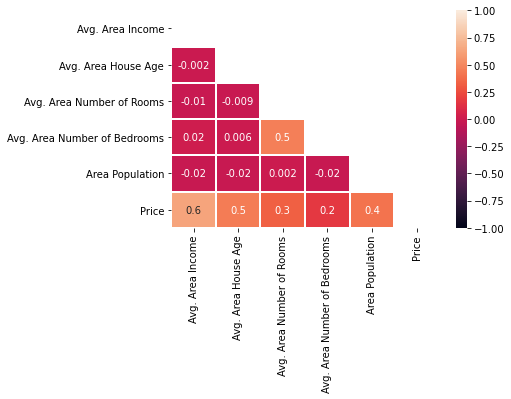

In [19]:
sns.heatmap(data=df.corr(),annot=True,vmin=-1,vmax=1,linewidths=1,fmt='.1g',mask =np.triu(df.corr()))
plt.show()

#.1g decimal control 
#line width box between spaces
#vmin,vmax scale limits

In [20]:
# price vs income have positive correlation,remaining all are close to zero

# checking multicolinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
x = df.loc[:,["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"]]
VIF = pd.DataFrame()
VIF['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
VIF["columns"]=x.columns
VIF.round(0)

,VIF,columns
0,30.0,Avg. Area Income
1,27.0,Avg. Area House Age
2,45.0,Avg. Area Number of Rooms
3,15.0,Avg. Area Number of Bedrooms
4,13.0,Area Population


In [29]:
#all are above 10 based on domain importances all the columns necessary

# Apply train test split

In [30]:
from sklearn.model_selection import train_test_split


In [35]:
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)
x_train.shape,y_train.shape

((3500, 5), (3500,))

# Apply model 

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [39]:
model.intercept_ # y = m1x1 +m2x2+...+c ,cis intercept 

-2645289.8643445214

In [40]:
model.coef_ # m1,m2,m3....

array([2.16398550e+01, 1.65729214e+05, 1.20958349e+05, 1.94909254e+03,
       1.52262240e+01])

# Get predictions

In [41]:
prediction = model.predict(x_test)
prediction

array([1555151.93147943, 1583399.08591038,  941481.35493888, ...,
       1099846.27241176,  974837.76026905, 1731306.80627189])

In [42]:
from sklearn import metrics

In [44]:
metrics.r2_score(y_test,prediction)*100

91.6691227159851

In [45]:
metrics.mean_absolute_error(y_test,prediction)

82745.90893674789